In [1]:
#Task: create a PLOT to visualized data to see WHEN the USA STARTED to DOMINATE the NobeL

In [2]:
#Steps:
#1. Import libraries and set up
#2. Import data
#3. Clean and transform data
#4. Plot data using 100% stacked are chart

In [52]:
#1. Import libraries and set up
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

In [3]:
#2. Import data
data = pd.read_csv("dataset.csv")
data.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [54]:
#3. Clean and transform data

#a. Check the unique names in birth_country	 to find USA
countries = data["birth_country"].sort_values().unique() #sort the values in A-Z and get only unique values
#the name of USA is 'United States of America'

#b. customize years into decades
data["decade"] = pd.cut(data["year"],
                        bins = range(1900, 2030, 10), #10 years in each bins from 1900 to 2016
                        labels = range(1900, 2020, 10)) #labels

#change all other countries to other countries values
data.loc[data["birth_country"] != 'United States of America', "birth_country"] = "other countries"

#select on decade and birth_country
country_winner = data.loc[:, ["decade", "birth_country"]]

#group by decade and country
country_winner = country_winner.groupby(["decade", "birth_country"]).size()
#this code mean group data by decade and birth_country, and count values in each group

#get the proportion of the each birth_country group in each year
proportions = country_winner.groupby(level=0, group_keys = False).apply(lambda x: x / float(x.sum()))
proportions = proportions.reset_index(name = "country_prop")
proportions["country_prop"] = proportions["country_prop"] * 100 #set country_prop to 100% form

#pivot data to create a matrix with decade as rows, birth_country as columns, and country_prop as values
proportions_pivot = proportions.pivot(index="decade", columns="birth_country", values="country_prop")

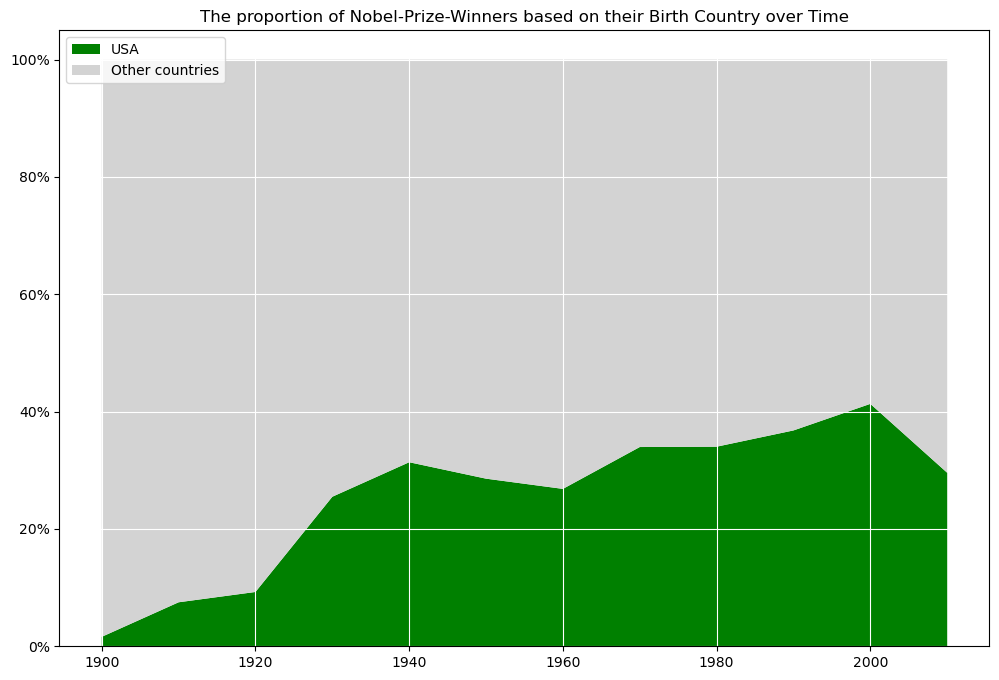

In [69]:
#4. Plot data using 100% stacked are chart
#create a figure
fig, ax = plt.subplots(figsize = (12, 8))

# draw a 100% stacked plot on the ax object
ax.stackplot(proportions_pivot.index, #decade now is index, so call it by call index
             proportions_pivot["United States of America"], #the first legend of stackplot
             proportions_pivot["other countries"], #the 2nd legend of stackplot
             labels = ["USA", "Other countries"], #the labels of 2 legend
            colors = ["green", "lightgrey"])

# set y-axis formatter to percentage
y_fmt = mtick.PercentFormatter() #assign the new format of ytick to y_fmt
ax.yaxis.set_major_formatter(y_fmt) #assign the new ytick format for ax subplot

#add legend
ax.legend(loc = "upper left")

#change title
ax.set_title("The proportion of Nobel-Prize-Winners based on their Birth Country over Time")

#add grid
ax.grid(True, color ="w")